# 회귀(Regression)
- 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 예를들면 아파트의 방 개수, 화장실 크기 등의 독립변수에 따라서 아파트 가격인 종속변 수가 어떤 관계를 가지는지를 모델링하고 예측한다

1. 선형 회귀(Linear regression)
    - 머신러닝에서 가장 일반적인 회귀분석 유형이라고 할 수 있는 선형 회귀는 예측 변수와 종속 변수로 구성되며, 이 둘은 선형 방식으로 서로 연관지어져 있다. 선형 회귀는 가장 적합한 선, 즉 최적적합선을 사용한다.
2. 로지스틱 회귀(Logistic regression)
    - 종속 변수에 이산 값이 있는 경우, 다시 말해 0 또는 1, 참 또는 거짓, 흑 또는 백, 스팸 또는 스팸 아닌 것 등의 두 가지 값 중 하나만 취할 수 있는 경우 사용하며 사실상 분류에 속한다.
3. 리지 회귀(Ridge regression)
    - 다중 회귀라고도 불리는 리지 회귀는 정규화 또는 규제화(regularization) 기법으로 알려져 있으며 모델의 복잡성을 줄이는 데 사용된다. 또한 ‘리지 회귀 페널티’로 알려진 약간의 편향, 즉 바이어스(bias)를 사용하여 모델이 과대적합(overfitting)에 덜 취약하게 만든 다.
4. 라쏘 회귀(Lasso regression) 라쏘 회귀는 리지 회귀와 같이 모델의 복잡성을 줄여주는 또 다른 정규화 기법이다.
    - 회귀 계수의 절대 사이즈를 금지함으로써 복잡성을 줄인다. 리지 회귀와는 다르게 아예 계수 값을 0에 가깝게 만든다.

## 회귀 평가지표
- 결정계수란?
    - 회귀모델이 주어진 자료에 얼마나 적합한지를 평가하는 지표
- y의 변동량대비 모델 예측값의 변동량을 의미함
- 사이킷런에서 제공하는 전체 평가지표는?
    - https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    - https://www.dataquest.io/blog/understanding-regression-error-metrics/

### 농어의 길이와 무게
 - 농어의 길이로 무게를 예측한다.
 - http://bit.ly/perch_data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# 1) 데이터 준비 => 2차원 넘파이 배열로 변경
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
perch_length.ndim, perch_weight.ndim

(1, 1)

In [9]:
print(len(perch_length))
print(len(perch_weight))

56
56


In [13]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]).reshape(-1,1)
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]).reshape(-1,1)
print(perch_length.ndim, perch_weight.ndim)
print(perch_length.shape, perch_weight.shape)

2 2
(56, 1) (56, 1)


In [20]:
df = pd.DataFrame(perch_length,
                 columns=['perch_length'])
df['perch_weight'] = perch_weight
df.head()

,perch_length,perch_weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [21]:
df.corr() # 상관관계

,perch_length,perch_weight
perch_length,1.000000,0.958656
perch_weight,0.958656,1.000000


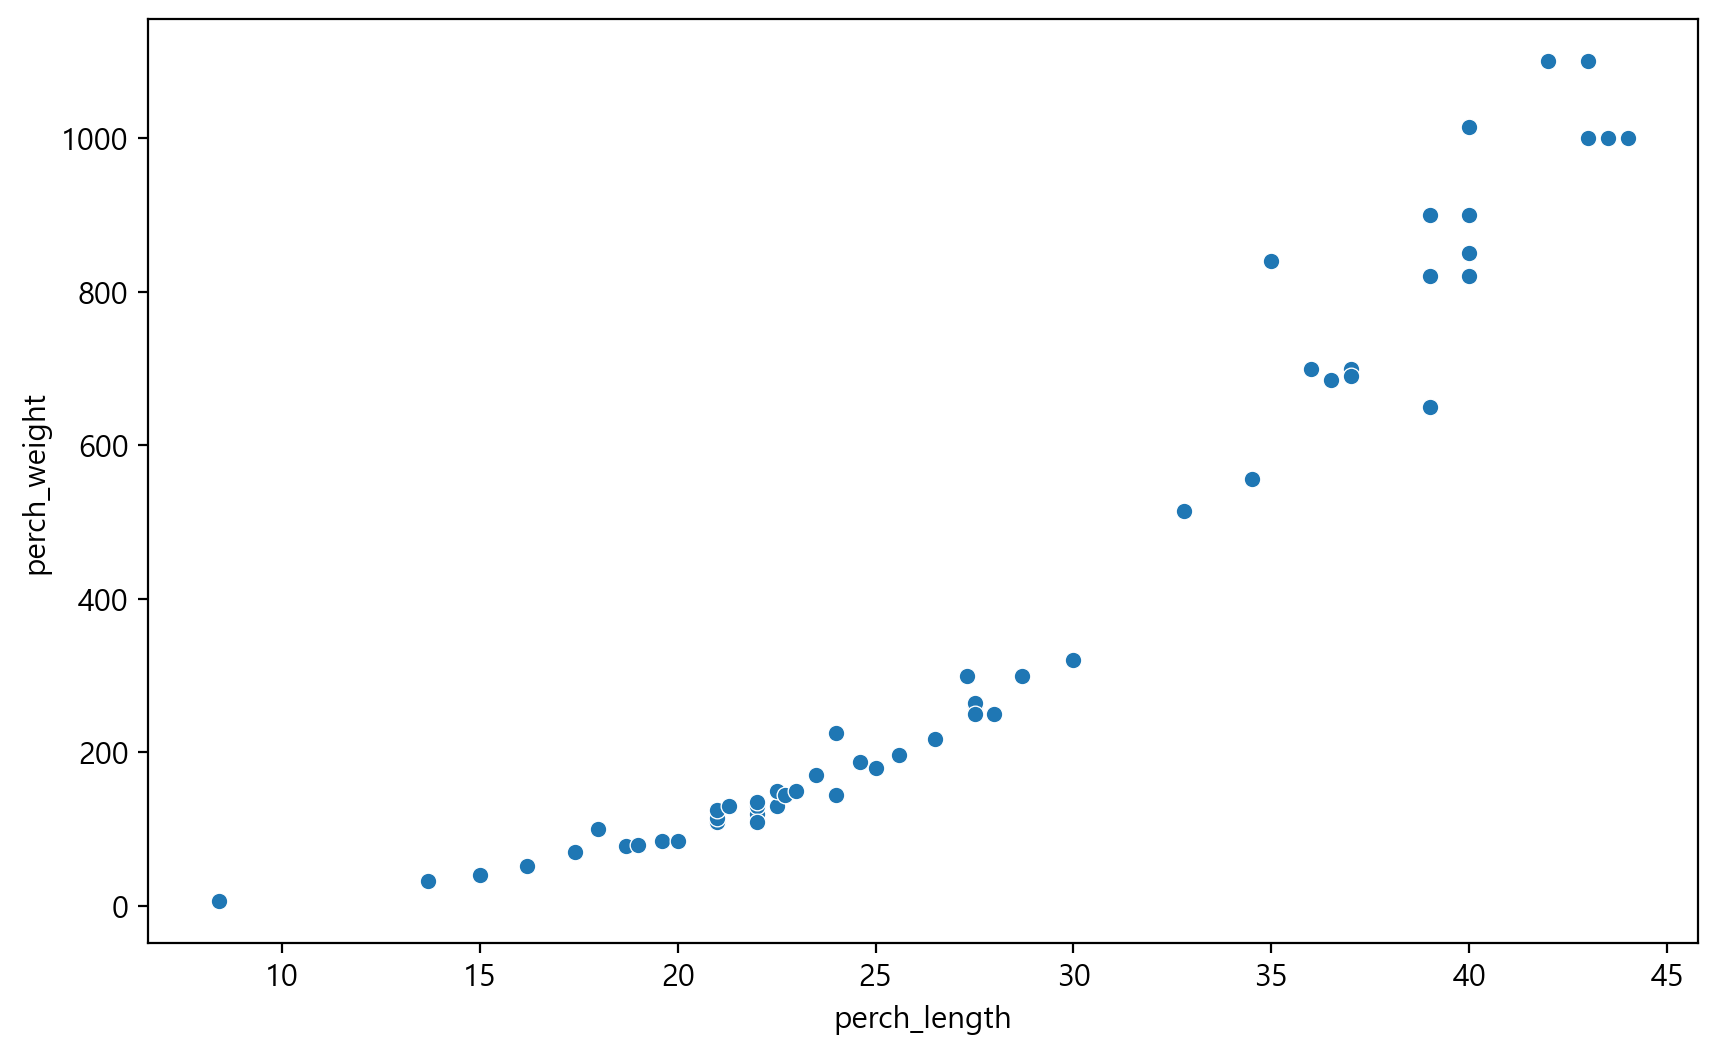

In [23]:
sns.scatterplot(x='perch_length' , y='perch_weight', data=df);

In [43]:
# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight,
                                                   random_state=42)
df.shape[0], len(X_train), len(X_test)

(56, 42, 14)

In [46]:
# Ridge 회귀 모델 생성
modelPerch = Ridge()

# 모델 학습
modelPerch.fit(X_train, y_train)

Ridge()

In [47]:
# 데이터 예측
modelPerch.predict(X_test)

array([[-381.03027228],
       [  -6.58270632],
       [ 363.96436416],
       [ 122.13364448],
       [ 168.93959023],
       [ 851.52629901],
       [ 461.47675113],
       [ 250.84999528],
       [ 812.52134423],
       [ 110.43215804],
       [ 988.04364077],
       [ -76.79162494],
       [ 383.46684156],
       [ 356.16337321]])

In [58]:
# Ridge 회귀 평가
print('MAE =', mean_absolute_error(y_test, modelPerch.predict(X_test)))
print('MSE =', mean_squared_error(y_test, modelPerch.predict(X_test)))
print('RMSE =', np.sqrt(mean_squared_error(y_test, modelPerch.predict(X_test))))
print('R2 =', r2_score(y_test, modelPerch.predict(X_test)))

MAE = 94.43293075750694
MSE = 17573.915146798434
RMSE = 132.56664417114297
R2 = 0.8249132136794866


In [54]:
# 선형 회귀 모델 생성
modelPerch_lr = LinearRegression()

# 모델 학습
modelPerch_lr.fit(X_train, y_train)

LinearRegression()

In [55]:
# 데이터 예측
modelPerch_lr.predict(X_test)

array([[-381.27462726],
       [  -6.71003561],
       [ 363.95284155],
       [ 122.04654277],
       [ 168.86711673],
       [ 851.66715359],
       [ 461.49570396],
       [ 250.80312115],
       [ 812.65000863],
       [ 110.34139928],
       [ 988.22716096],
       [ -76.94089654],
       [ 383.46141403],
       [ 356.14941255]])

In [57]:
# 선형 회귀 평가
print('MAE =', mean_absolute_error(y_test, modelPerch_lr.predict(X_test)))
print('MSE =', mean_squared_error(y_test, modelPerch_lr.predict(X_test)))
print('RMSE =', np.sqrt(mean_squared_error(y_test, modelPerch_lr.predict(X_test))))
print('R2 =', r2_score(y_test, modelPerch_lr.predict(X_test)))

MAE = 94.46122937985581
MSE = 17590.265977889187
RMSE = 132.6283000640858
R2 = 0.8247503123313558


#### 캘리포니아 집값 예측

In [63]:
import sklearn.datasets

In [71]:
california = sklearn.datasets.fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [100]:
type(california)
california['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [101]:
df = pd.DataFrame(california['data'],
                 columns=california['feature_names'])
df['target'] = california['target']
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [104]:
df.sample(10)
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -12

In [105]:
medInc = df['MedInc']
houseAge = df['HouseAge']
aveRooms = df['AveRooms']
aveBedrms = df['AveBedrms']
pops = df['Population']
aveOccup = df['AveOccup']
latitude = df['Latitude']
longitude = df['Longitude']

X_train, X_test, y_train, y_test = train_test_split(df,
                                                   test_size=0.2, random_state=10)

modelCaEst = LinearRegression()
modelCaEst.fit(X_train, y_train)

ValueError: not enough values to unpack (expected 4, got 2)